# Importing Required Libraries

In [2]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [3]:
def get_project_root():
    """Returns the root directory of the project."""
    cwd = Path.cwd()
    
    for parent in cwd.parents:
        if ( parent / "data" ).exists():
            return parent
        

    raise FileNotFoundError("Project root not found. Ensure this script is run within the project directory structure.")

get_project_root()


WindowsPath('e:/Personal/DelhiveryFE')

In [4]:
file_path= os.path.join(get_project_root(), 'data', 'delhivery.csv')

df= pd.read_csv(file_path)
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [10]:
columns= df.columns
print(f"There are {len(columns)} columns in the dataset.")
print("The columns are:")
for i in range(len(columns)):
    print(f"{i+1}. {columns[i]}")

There are 24 columns in the dataset.
The columns are:
1. data
2. trip_creation_time
3. route_schedule_uuid
4. route_type
5. trip_uuid
6. source_center
7. source_name
8. destination_center
9. destination_name
10. od_start_time
11. od_end_time
12. start_scan_to_end_scan
13. is_cutoff
14. cutoff_factor
15. cutoff_timestamp
16. actual_distance_to_destination
17. actual_time
18. osrm_time
19. osrm_distance
20. factor
21. segment_actual_time
22. segment_osrm_time
23. segment_osrm_distance
24. segment_factor


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2746 entries, 0 to 2745
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data                            2746 non-null   object 
 1   trip_creation_time              2746 non-null   object 
 2   route_schedule_uuid             2746 non-null   object 
 3   route_type                      2746 non-null   object 
 4   trip_uuid                       2746 non-null   object 
 5   source_center                   2746 non-null   object 
 6   source_name                     2734 non-null   object 
 7   destination_center              2746 non-null   object 
 8   destination_name                2742 non-null   object 
 9   od_start_time                   2746 non-null   object 
 10  od_end_time                     2746 non-null   object 
 11  start_scan_to_end_scan          2746 non-null   float64
 12  is_cutoff                       27

In [7]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,2746.000000,2746.000000,2746.000000,2746.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000
mean,662.062272,158.540058,159.655157,278.289512,149.349362,195.573052,2.105080,35.422587,17.110018,20.820740,2.441008
std,837.816953,277.704239,278.114379,451.711576,254.167950,345.032169,1.459549,52.366204,11.338368,12.984463,10.056493
min,31.000000,9.000000,9.000267,9.000000,6.000000,9.202000,0.272727,-26.000000,0.000000,0.000000,-1.857143
25%,122.000000,22.000000,22.227437,43.000000,23.000000,26.294400,1.548387,18.000000,10.000000,10.930500,1.333333
50%,270.000000,44.000000,44.379581,89.000000,45.000000,51.366600,1.801126,27.000000,16.000000,22.556600,1.692308
75%,836.000000,154.000000,154.070426,277.750000,138.000000,178.364100,2.200000,39.000000,22.000000,26.914200,2.307692
max,3230.000000,1689.000000,1689.340140,2815.000000,1549.000000,2095.672900,31.200000,1038.000000,142.000000,154.061600,493.000000


In [8]:
df.describe(include= "object")

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,2746,2746,2746,2746,2746,2746,2734,2746,2742,2746,2746,2746
unique,2,333,284,2,333,384,382,391,389,609,609,2680
top,training,2018-09-30 05:09:09.625407,thanos::sroute:e2f5faaa-455a-494b-a501-549c3e3...,FTL,trip-153828414962515194,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 21:22:26.863736,2018-09-23 03:12:44.562263,2018-09-18 00:29:20
freq,1886,77,120,1735,77,394,394,232,232,77,77,3


# Univariate Analysis

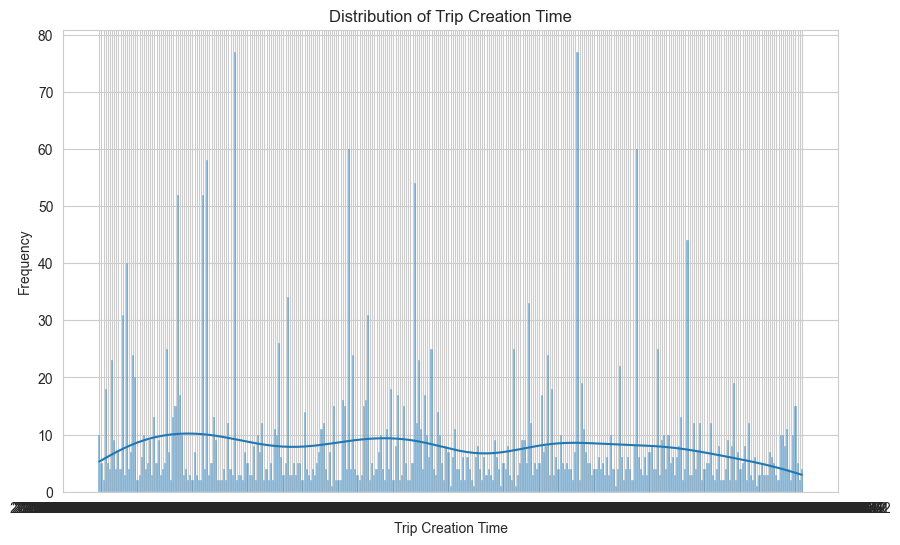

In [12]:
from seaborn import histplot
plt.figure(figsize=(10, 6))

sns.set_style("whitegrid")

histplot(df["trip_creation_time"], bins= 10, kde= True)
plt.title("Distribution of Trip Creation Time")
plt.xlabel("Trip Creation Time")
plt.ylabel("Frequency")
plt.show()